# Setup:

Setting up TPU for training CNN

In [1]:
import tensorflow as tf

resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='')
tf.config.experimental_connect_to_cluster(resolver)
# This is the TPU initialization code that has to be at the beginning.
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))

strategy = tf.distribute.TPUStrategy(resolver)

INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Initializing the TPU system: grpc://10.108.231.194:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.108.231.194:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


All devices:  [LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU')]
INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


# Data:

Get face data from Labeled Faces in the Wild dataset

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

Name: George W Bush


(1288, 125, 94, 3)

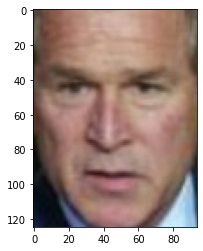

In [2]:
# Get training data
from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=1, color=True)

# Split into useful variables
import numpy as np
faces = lfw_people['images'].astype(np.uint8)
target = lfw_people['target']
target_names = lfw_people['target_names']
n_classes = len(target_names)
img_size = faces.shape[1:]

# Show a face to make sure they're formatted corerctly
example_face_index = 911
from matplotlib import pyplot as plt
plt.imshow(faces[example_face_index])
display(plt)
print("Name:", target_names[target[example_face_index]])
display(faces.shape)

Exploring the format of the data

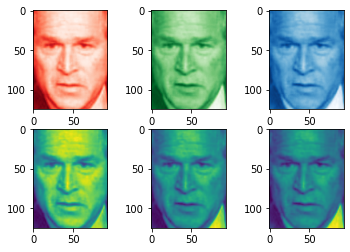

In [3]:
restore_shape = lambda a : a.reshape((faces[0].shape[:2]))
faces_3chan = []
for i in range(len(faces)):
  rc, gc, bc = np.split(np.array(np.dsplit(faces[i], 3)).flatten(), 3, axis=0)
  faces_3chan.append([restore_shape(rc), restore_shape(gc), restore_shape(bc)])

# Show example face
fig, axs = plt.subplots(nrows=2, ncols=3)
for ax in axs:
  for a in ax: a.set_facecolor((0, 0, 0))
axs[0][0].imshow(faces_3chan[example_face_index][0], alpha=1, cmap="Reds_r") # Red channel
axs[0][1].imshow(faces_3chan[example_face_index][1], alpha=1, cmap="Greens_r") # Green channel
axs[0][2].imshow(faces_3chan[example_face_index][2], alpha=1, cmap="Blues_r") # Blue channel
axs[1][0].imshow(faces_3chan[example_face_index][0], alpha=1) # Red channel
axs[1][1].imshow(faces_3chan[example_face_index][1], alpha=1) # Green channel
axs[1][2].imshow(faces_3chan[example_face_index][2], alpha=1) # Blue channel

Split into training and testing sets

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(faces, target, test_size=0.2, random_state=1234)

# Transfer Learning

## Helper Functions

In [5]:
def plot_misclassified(images, y_true, y_pred, class_labels, actual, predicted, required_cols=5, figure_width=15):
    import numpy as np
    from matplotlib import pyplot as plt
    from itertools import product
    
    images = np.array(images)
    class_labels = np.array(class_labels)
    actual_class = np.where(class_labels == actual)[0]
    predicted_class = np.where(class_labels == predicted)[0]

    act_as_pred = images[(y_true == actual_class) & (y_pred == predicted_class)]
    reqd_rows = np.ceil(len(act_as_pred) / required_cols).astype(int)
    fig, axs = plt.subplots(nrows=reqd_rows, ncols=required_cols, figsize=(figure_width, figure_width * reqd_rows / required_cols))
    for r, c, in product(range(reqd_rows), range(required_cols)):
        axs[r][c].set_axis_off()

    for idx, img in enumerate(act_as_pred):
        axs[idx // required_cols][idx % required_cols].set_axis_on()
        axs[idx // required_cols][idx % required_cols].set_xticks([])
        axs[idx // required_cols][idx % required_cols].set_yticks([])
        axs[idx // required_cols][idx % required_cols].imshow(img)
    plt.tight_layout()

In [6]:
def plot_network_performance(hist, lim1, lim2, figsize):
  history_dict = hist.history
  loss_values = history_dict['loss']
  val_loss_values = history_dict['val_loss']
  accuracy = history_dict['accuracy']
  val_accuracy = history_dict['val_accuracy']
  
  epochs = range(1, len(loss_values) + 1)
  fig, ax = plt.subplots(1, 1, figsize=figsize)
  #
  # Plot the model accuracy (MAE) vs Epochs
  #
  ax.plot(epochs, accuracy, 'bo', label='Training accuracy')
  ax.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
  ax.set_title('Training & Validation Accuracy', fontsize=16)
  ax.set_xlabel('Epochs', fontsize=16)
  ax.set_ylabel('Accuracy', fontsize=16)
  ax.legend()
  ax.set_ylim(lim1, lim2)

In [7]:
from keras.callbacks import Callback
class EarlyStoppingByAccuracyVal(Callback): # Stolen callback class from stackoverflow
  def __init__(self, monitor='val_loss', value=0.00001, verbose=0):
      super(Callback, self).__init__()
      self.monitor = monitor
      self.value = value
      self.verbose = verbose

  def on_epoch_end(self, epoch, logs={}):
      current = logs.get(self.monitor)
      if current is None: warnings.warn("Early stopping requires %s available!" % self.monitor, RuntimeWarning)
      elif current > self.value:
          if self.verbose > 0: print("Epoch %05d: early stopping THR" % epoch)
          self.model.stop_training = True
          good_accuracy = True

## The CNN:

After much fidling I have found a network that achieves a good generalisation accuracy most times it is trained on this data.

In [8]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

def compile_network():
  with strategy.scope():
    net = tf.keras.models.Sequential([  
          tf.keras.layers.Conv2D(500, kernel_size=(7, 7), activation='relu', input_shape=img_size),
          tf.keras.layers.AveragePooling2D(pool_size=(2, 2)),  

          tf.keras.layers.Conv2D(600, kernel_size=(5, 5), activation='relu', input_shape=img_size),
          tf.keras.layers.AveragePooling2D(pool_size=(2, 2)),
          tf.keras.layers.Dropout(0.5),

          tf.keras.layers.Conv2D(700, kernel_size=(3, 3), activation='relu', input_shape=img_size),
          tf.keras.layers.AveragePooling2D(pool_size=(2, 2)),
          tf.keras.layers.Dropout(0.5),

          tf.keras.layers.Flatten(),

          tf.keras.layers.Dense(128, activation='relu'),
          tf.keras.layers.Dense(64, activation='relu'),
          tf.keras.layers.Dense(32, activation='relu'),
          tf.keras.layers.Dense(16, activation='relu'),
          tf.keras.layers.Dense(n_classes)
    ])
    net.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])
    return net

We will aim for 80% validation accuracy as after some trials the model seems to start overfitting past this point. Occasionally the network gets stuck reporting the most common class, effectively acting as a dummy classifier. Ideally we would use a dataset with an equal number of images for each person to fix this. A more hacky solution is simply to repeat training if this happens. With this method I was able to achieve an accuracy of just below 90% given enough attempts. However, I have set the min_accuracy to 0.85 for faster training. It should only take a maximun of 3 attempts to get there, and often only needs one attempt.

In [9]:
min_accuracy = 0.85 # 0.9 Can work after many attempts

callbacks = [EarlyStoppingByAccuracyVal(monitor='val_accuracy', value=min_accuracy, verbose=1)]

final_score = 0
history = None
num_training_attempts = 0

while final_score < min_accuracy: # Training will continue until validation accuracy is satasfactory.

  net = compile_network()
  history = net.fit(x_train, y_train, batch_size=195, epochs=200, verbose=1, validation_split=0.2, callbacks=callbacks)
  
  final_score = history.history['val_accuracy'][-1:][0]
  num_training_attempts += 1

Epoch 1/200
Instructions for updating:
use `experimental_local_results` instead.


Instructions for updating:
use `experimental_local_results` instead.


5/5 [==============================] - 67s 12s/step - loss: 607.9299 - accuracy: 0.1396 - val_loss: 1.9602 - val_accuracy: 0.1359
Epoch 2/200
5/5 [==============================] - 2s 377ms/step - loss: 2.0868 - accuracy: 0.1638 - val_loss: 1.8805 - val_accuracy: 0.1650
Epoch 3/200
5/5 [==============================] - 2s 384ms/step - loss: 1.8644 - accuracy: 0.1917 - val_loss: 1.8645 - val_accuracy: 0.1650
Epoch 4/200
5/5 [==============================] - 2s 382ms/step - loss: 1.8852 - accuracy: 0.1917 - val_loss: 1.9130 - val_accuracy: 0.1650
Epoch 5/200
5/5 [==============================] - 2s 379ms/step - loss: 1.8539 - accuracy: 0.1917 - val_loss: 1.8436 - val_accuracy: 0.1650
Epoch 6/200
5/5 [==============================] - 2s 377ms/step - loss: 1.8423 - accuracy: 0.1917 - val_loss: 1.8503 - val_accuracy: 0.1650
Epoch 7/200
5/5 [==============================] - 2s 378ms/step - loss: 1.8385 - accuracy: 0.1917 - val_loss: 1.8647 - val_accuracy: 0.1650
Epoch 8/200
5/5 [=======

In [10]:
print("The Network is", str(round(final_score*100, 2)) + "%", "accurate on the validation data.")

The Network is 85.92% accurate on the validation data.


### Plot training vs validation accuracy:

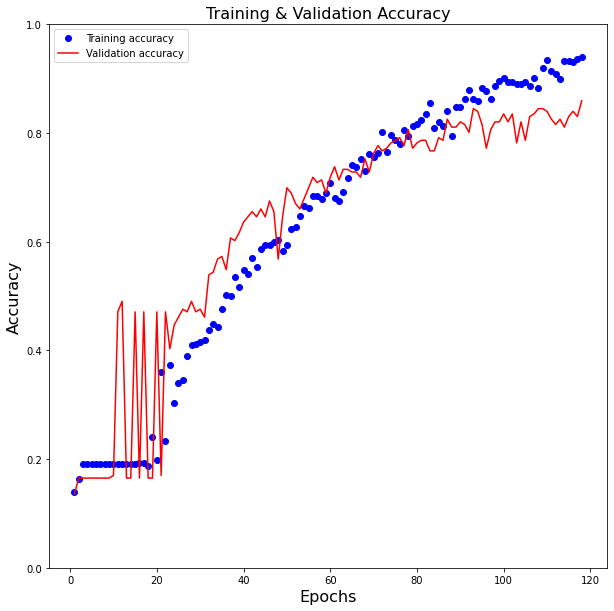

In [11]:
plot_network_performance(history, 0, 1, (10, 10))

Most often the network will start to overfit the data at around 80% accuracy. However, our validation accuracy will still increase by a small amount if we keep training past this point.

### Test network on unseen data:

In [12]:
from numpy import argmax    
y_pred = argmax(net.predict(x_test), axis=1)

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score
import pandas as pd
print(" =========================================== Confusion Matrix ==========================================")
display(pd.DataFrame(confusion_matrix(y_pred, y_test), columns=target_names))

 =========================================== Confusion Matrix ==========================================


,Ariel Sharon,Colin Powell,Donald Rumsfeld,George W Bush,Gerhard Schroeder,Hugo Chavez,Tony Blair
0,9,0,1,0,0,4,0
1,0,36,1,2,0,0,0
2,1,0,19,2,4,1,0
3,0,5,4,100,2,4,1
4,0,1,1,3,14,0,0
5,0,0,0,0,1,7,1
6,0,2,1,6,1,1,23


Final Accuracy:

In [14]:
print("The Network is", str(round(accuracy_score(y_test, y_pred)*100, 2)) + "%", "accurate on unseen data.")

The Network is 80.62% accurate on unseen data.
